Processing: Exp_2_2/sklearnDigits
Models found: ['XGB', 'SVM', 'CNN', 'RNN', 'MLP', 'RF']
Combined data shape for Exp_2_2_sklearnDigits: (1800, 21)
Saved aggregated data for Exp_2_2_sklearnDigits to /home/ankit-gupta/Downloads/test/aggregated_data/Exp_2_2_sklearnDigits_aggregated.csv
Analyzing data for Exp_2_2_sklearnDigits...
Mean values for Exp_2_2_sklearnDigits:
       Confidence (Target Class)  SSIM (Target Class)
Model                                                
CNN                     0.994259         1.000780e-05
MLP                     0.986603         4.442057e-07
RF                      0.925167         2.172785e-04
RNN                     0.997958         3.225317e-06
SVM                     0.855389         1.143823e-01
XGB                     0.999347        -5.961762e-07
Standard deviation values for Exp_2_2_sklearnDigits:
       Confidence (Target Class)  SSIM (Target Class)
Model                                                
CNN                     0.009768       

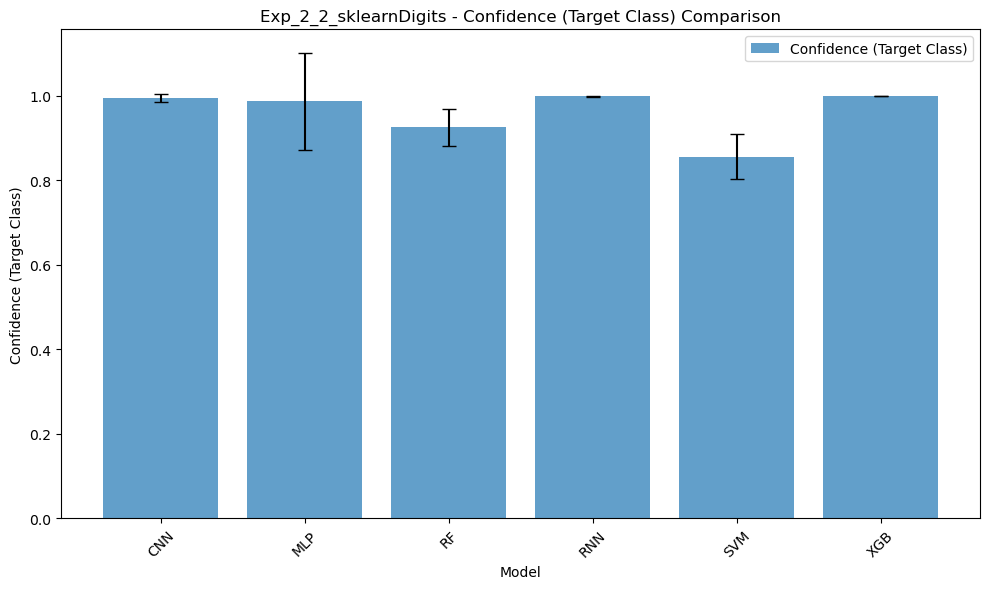

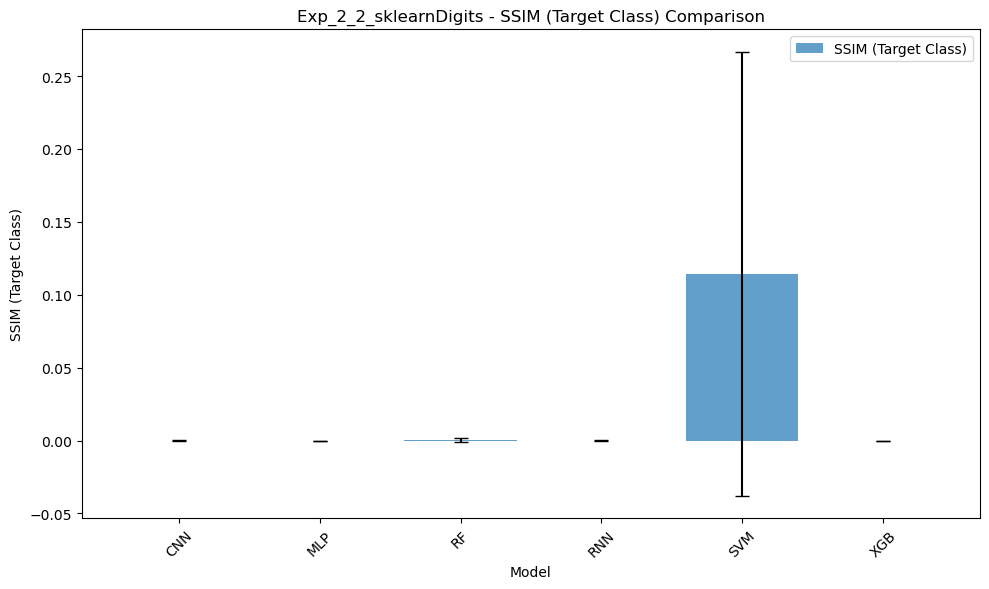

Available datasets for analysis: dict_keys(['Exp_2_2_sklearnDigits'])
Sample data for Exp_2_2_sklearnDigits:
   Generation   Fitness  Confidence (Target Class)  \
0       50000  0.999524                   0.999531   
1       50000  0.999437                   0.999440   
2       50000  0.999509                   0.999531   
3       50000  0.999210                   0.999210   
4       50000  0.999008                   0.999015   

   Confidence (Similarity Class)  SSIM (Target Class)  \
0                       0.999531         6.820860e-06   
1                       0.999440         2.992535e-06   
2                       0.999531        -2.185045e-05   
3                       0.999210        -1.336083e-07   
4                       0.999015         6.762523e-06   

   SSIM (Similarity Class)  SSIM (Target Class).1  SSIM (Similarity Class).1  \
0             6.820860e-06              -0.034241                  -0.034241   
1             2.992535e-06              -0.020158              

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def load_and_aggregate_all_data(base_dir, experiments, datasets):
    """
    Load and aggregate scores for all combinations of experiments and datasets.

    Args:
        base_dir (str): Base directory where data is stored.
        experiments (list): List of experiment names.
        datasets (list): List of dataset names.

    Returns:
        dict: Dictionary with keys as "<experiment>_<dataset>" and values as aggregated DataFrames.
    """
    aggregated_results = {}

    for experiment in experiments:
        for dataset in datasets:
            aggregated_data = []

            experiment_path = os.path.join(base_dir, experiment, dataset)
            models = [m for m in os.listdir(experiment_path) if os.path.isdir(os.path.join(experiment_path, m))]

            print(f"Processing: {experiment}/{dataset}")
            print(f"Models found: {models}")

            for model in models:
                model_path = os.path.join(experiment_path, model)
                classes = [c for c in os.listdir(model_path) if c.startswith("class_")]

                for cls in classes:
                    class_path = os.path.join(model_path, cls)
                    replicates = [r for r in os.listdir(class_path) if r.startswith("replicate_")]

                    for replicate in replicates:
                        replicate_path = os.path.join(class_path, replicate)
                        csv_files = [f for f in os.listdir(replicate_path) if f.endswith(".csv")]

                        for csv_file in csv_files:
                            csv_path = os.path.join(replicate_path, csv_file)
                            df = pd.read_csv(csv_path)
                            if "Generation" in df.columns:
                                final_gen = df[df["Generation"] == df["Generation"].max()].copy()
                                final_gen["Model"] = model
                                final_gen["Class"] = cls
                                final_gen["Replicate"] = replicate
                                aggregated_data.append(final_gen)

            combined_data = pd.concat(aggregated_data, ignore_index=True) if aggregated_data else pd.DataFrame()
            key = f"{experiment}_{dataset}"
            aggregated_results[key] = combined_data

            print(f"Combined data shape for {key}: {combined_data.shape}")

    return aggregated_results


def save_aggregated_data(aggregated_results, output_dir):
    """
    Save the aggregated data for each experiment-dataset combination as CSV files.

    Args:
        aggregated_results (dict): Dictionary with aggregated DataFrames.
        output_dir (str): Directory to save the CSV files.

    Returns:
        None
    """
    os.makedirs(output_dir, exist_ok=True)

    for key, data in aggregated_results.items():
        output_path = os.path.join(output_dir, f"{key}_aggregated.csv")
        data.to_csv(output_path, index=False)
        print(f"Saved aggregated data for {key} to {output_path}")


def analyze_all_combinations(aggregated_results, metrics):
    """
    Perform analysis on the loaded data for all combinations of experiments and datasets.

    Args:
        aggregated_results (dict): Dictionary with aggregated DataFrames.
        metrics (list): List of metrics to analyze.

    Returns:
        None
    """
    for key, data in aggregated_results.items():
        if data.empty:
            print(f"No data available for {key}.")
            continue

        print(f"Analyzing data for {key}...")

        # Group by Model and calculate mean and std for the metrics
        grouped = data.groupby("Model")[metrics]
        means = grouped.mean()
        stds = grouped.std()

        print(f"Mean values for {key}:")
        print(means)

        print(f"Standard deviation values for {key}:")
        print(stds)

        # Generate bar plots for each metric
        for metric in metrics:
            plt.figure(figsize=(10, 6))
            x = np.arange(len(means.index))
            plt.bar(x, means[metric], yerr=stds[metric], capsize=5, alpha=0.7, label=metric)
            plt.xticks(x, means.index, rotation=45)
            plt.title(f"{key} - {metric} Comparison")
            plt.xlabel("Model")
            plt.ylabel(metric)
            plt.legend()
            plt.tight_layout()
            plt.show()


# Base directory and parameters
base_dir = "/home/ankit-gupta/Downloads/EPIC Fool Files/Data Generated/"
experiments = ["Exp_2_2"]
datasets = ["sklearnDigits"]
output_dir = "/home/ankit-gupta/Downloads/test/aggregated_data"
metrics_to_analyze = ["Confidence (Target Class)", "SSIM (Target Class)"]

# Load all data
aggregated_results = load_and_aggregate_all_data(base_dir, experiments, datasets)

# Save the aggregated data for further analysis
save_aggregated_data(aggregated_results, output_dir)

# Perform analysis on all combinations
analyze_all_combinations(aggregated_results, metrics_to_analyze)

# Access individual datasets for analysis
data_keys = aggregated_results.keys()
print("Available datasets for analysis:", data_keys)

# Example: Accessing a specific dataset
for experiment in experiments:
    for dataset in datasets:
        example_key = f"{experiment}_{dataset}"
        if example_key in aggregated_results:
            example_data = aggregated_results[example_key]
            print(f"Sample data for {example_key}:")
            print(example_data.head())


In [5]:

# Example: Accessing a specific dataset
for experiment in experiments:
    for dataset in datasets:
        example_key = f"{experiment}_{dataset}"
        if example_key in aggregated_results:
            example_data = aggregated_results[example_key]
            # Display summary statistics
            print(f"Summary statistics for {example_key}:")
            print(example_data.describe())

            # Display the data types of each column
            print(f"Data types for {example_key}:")
            print(example_data.dtypes)

            # Check for missing values
            print(f"Missing values for {example_key}:")
            print(example_data.isnull().sum())


Summary statistics for Exp_2_2_sklearnDigits:
       Generation       Fitness  Confidence (Target Class)  \
count      1800.0  1.800000e+03               1.800000e+03   
mean      50000.0  9.406429e-01               9.597871e-01   
std           0.0  1.272084e-01               7.642037e-02   
min       50000.0 -5.373019e-07               4.533057e-14   
25%       50000.0  9.299880e-01               9.300000e-01   
50%       50000.0  9.983050e-01               9.983300e-01   
75%       50000.0  9.995902e-01               9.996012e-01   
max       50000.0  9.999999e-01               1.000000e+00   

       Confidence (Similarity Class)  SSIM (Target Class)  \
count                   1.800000e+03          1800.000000   
mean                    9.597871e-01             0.019102   
std                     7.642037e-02             0.075360   
min                     4.533057e-14            -0.003996   
25%                     9.300000e-01            -0.000007   
50%                     9.983

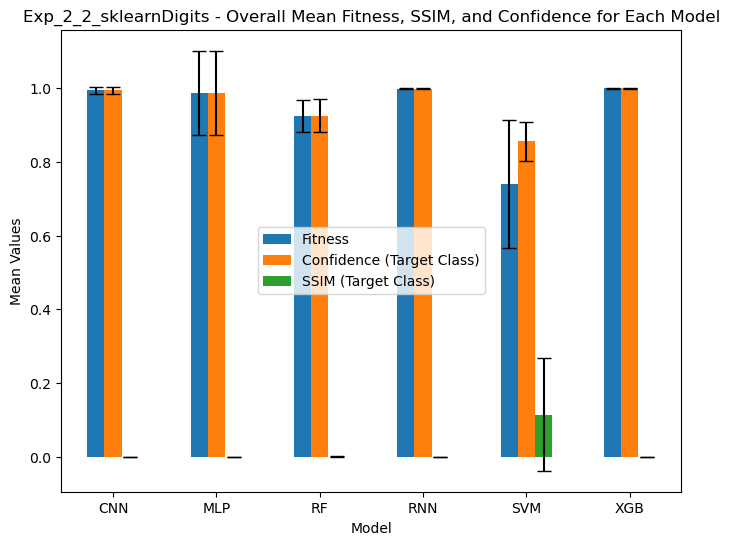

In [6]:
# Ensure 'Fitness' is included in overall_columns
overall_columns = ["Fitness", "Confidence (Target Class)", "SSIM (Target Class)"]

for experiment in experiments:
    for dataset in datasets:
        example_key = f"{experiment}_{dataset}"
        if example_key in aggregated_results:
            example_data = aggregated_results[example_key]

            # Model-wise mean values for each class
            model_class_means = example_data.groupby(['Model', 'Class'])[overall_columns].mean().unstack()

            # Overall mean values for each model with error bars
            model_means = example_data.groupby('Model')[overall_columns].mean()
            model_stds = example_data.groupby('Model')[overall_columns].std()
            model_means.plot(kind='bar', yerr=model_stds, capsize=5, figsize=(8, 6))
            plt.title(f"{example_key} - Overall Mean Fitness, SSIM, and Confidence for Each Model")
            plt.ylabel("Mean Values")
            plt.xticks(rotation=0)
            plt.show()


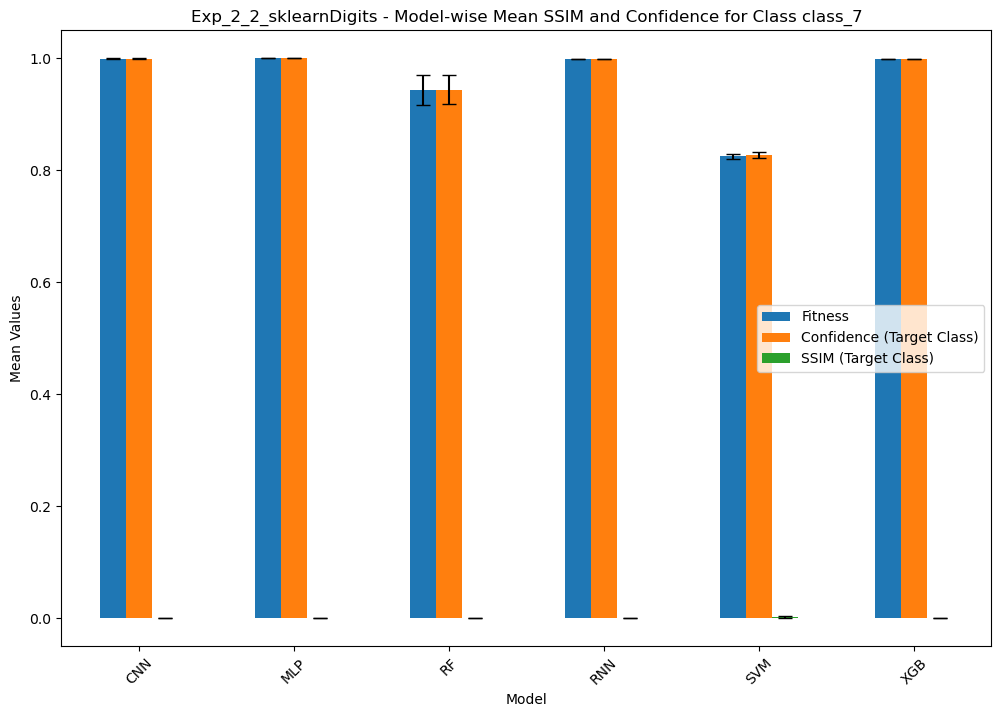

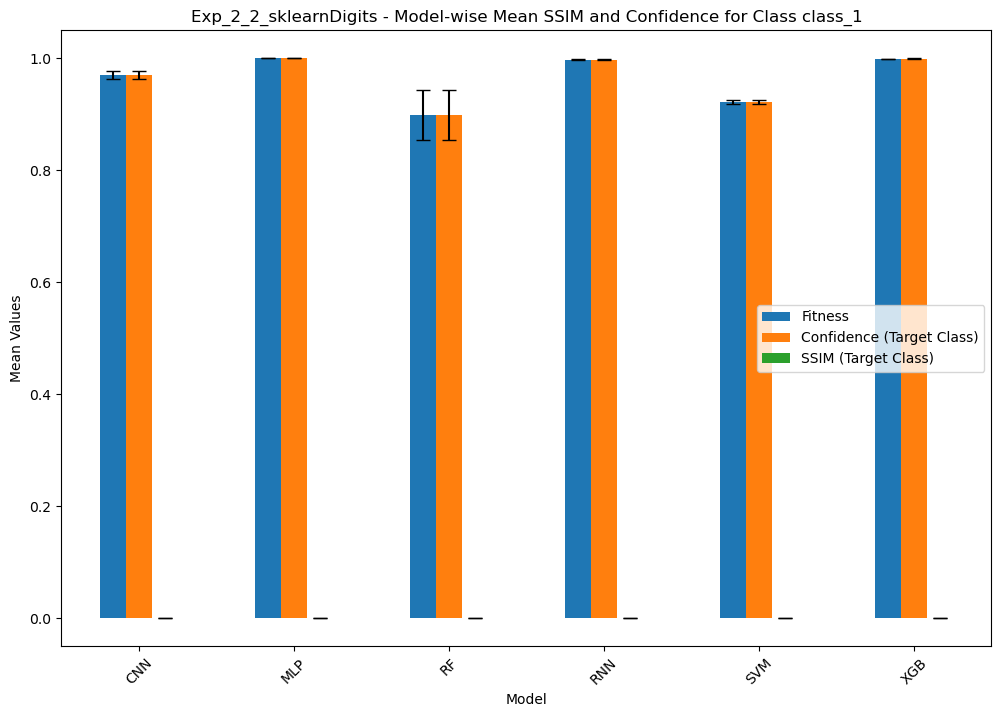

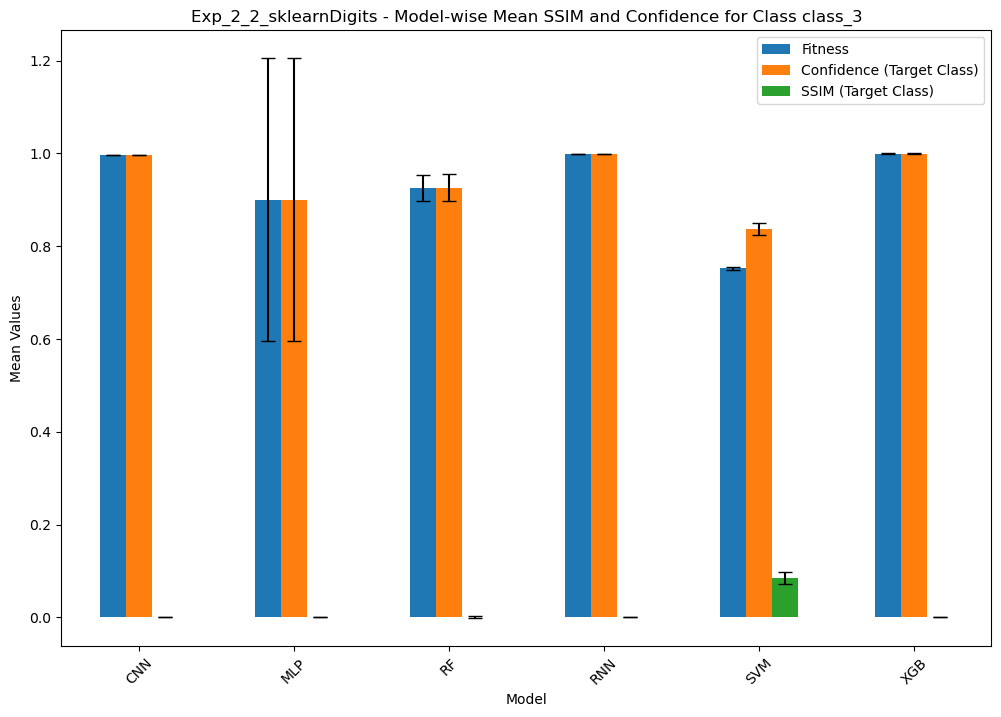

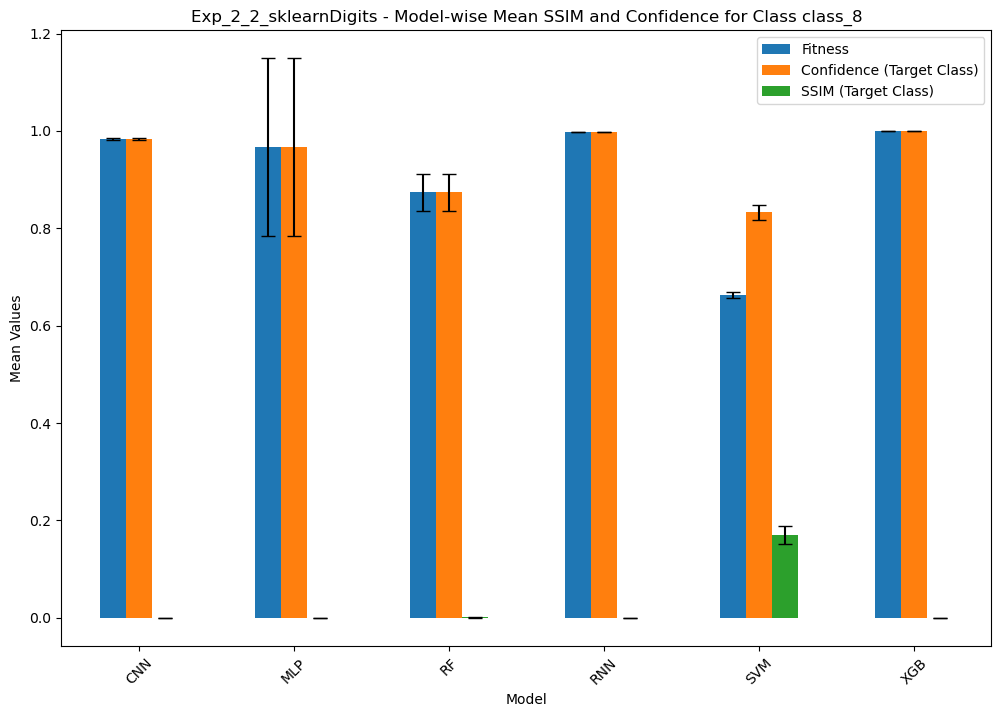

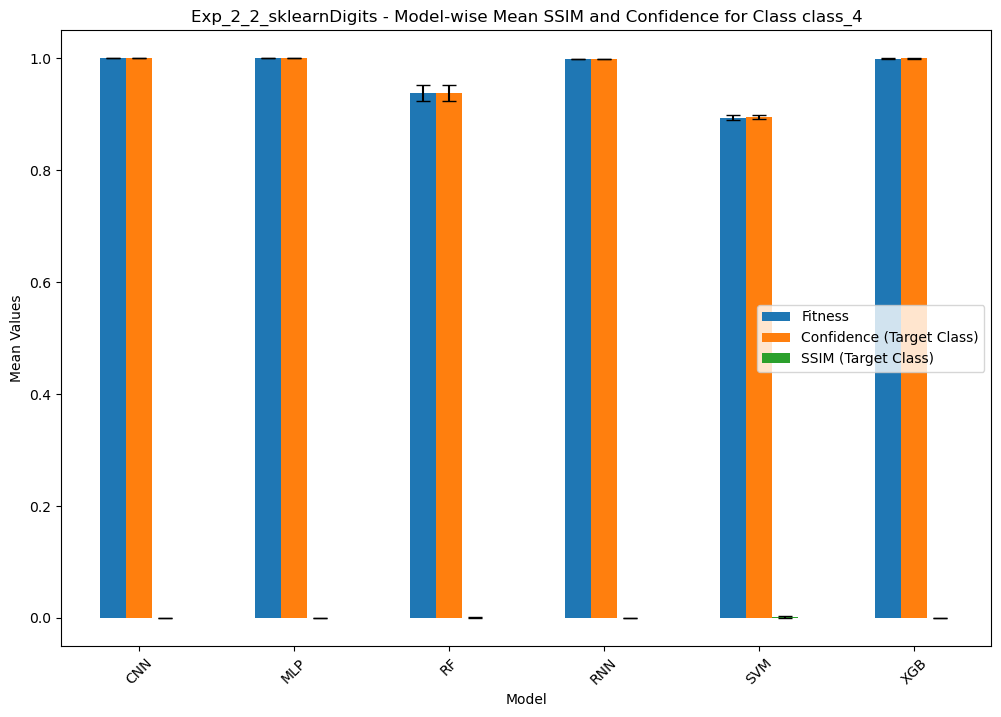

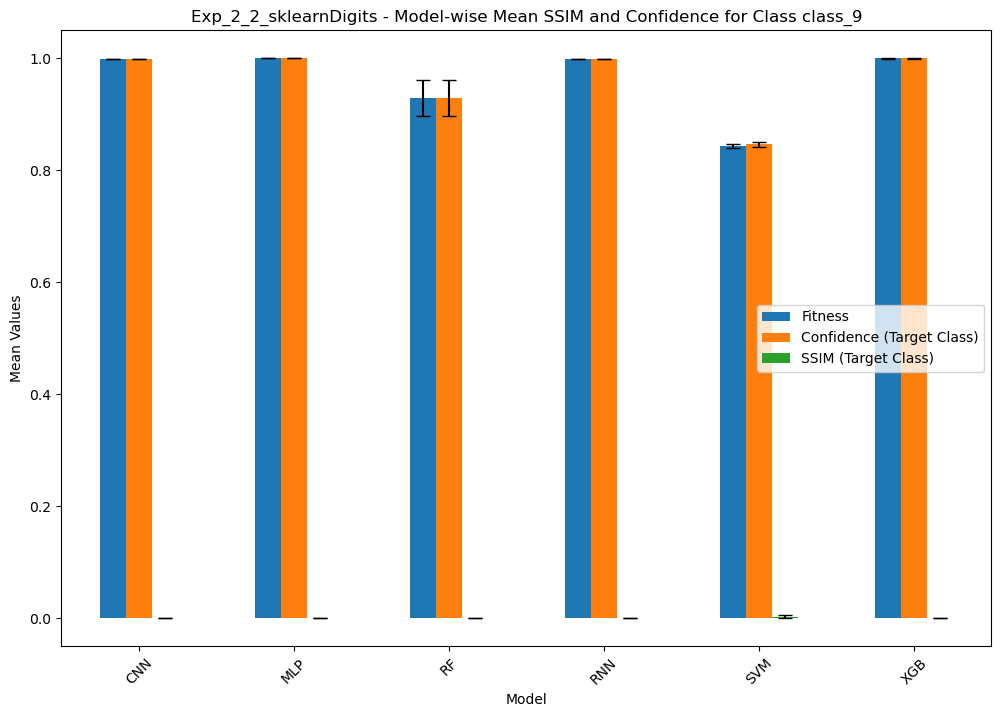

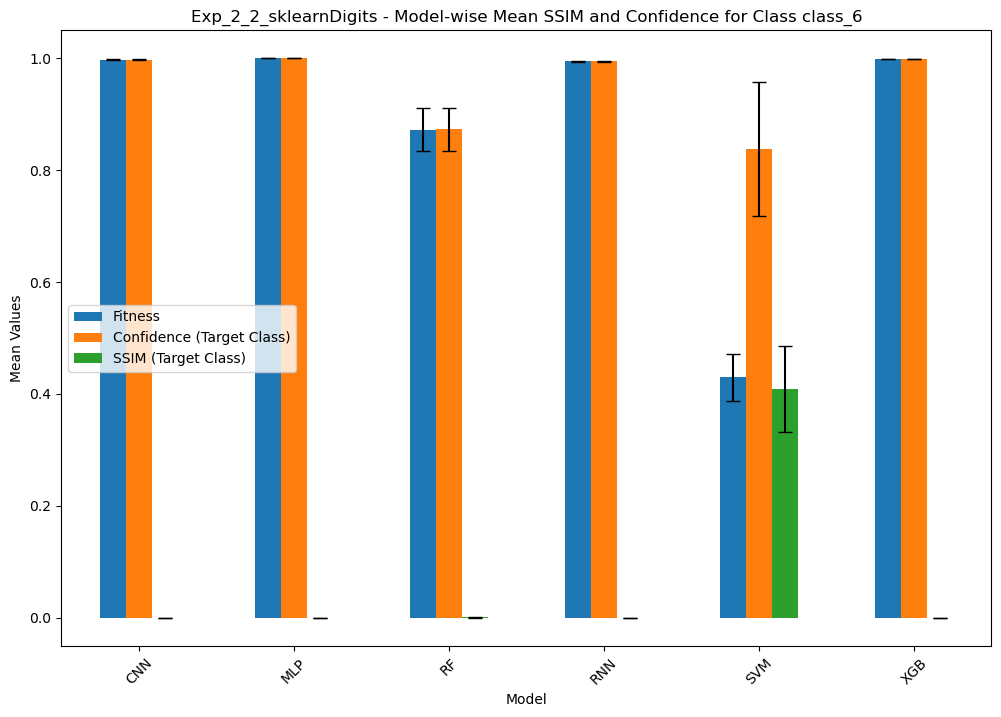

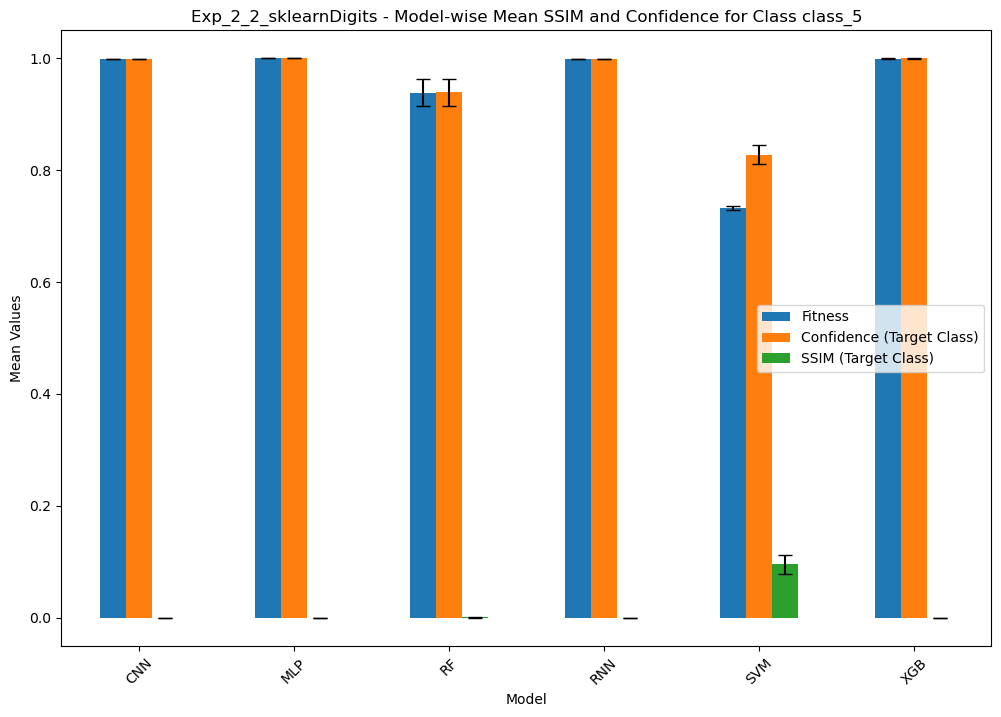

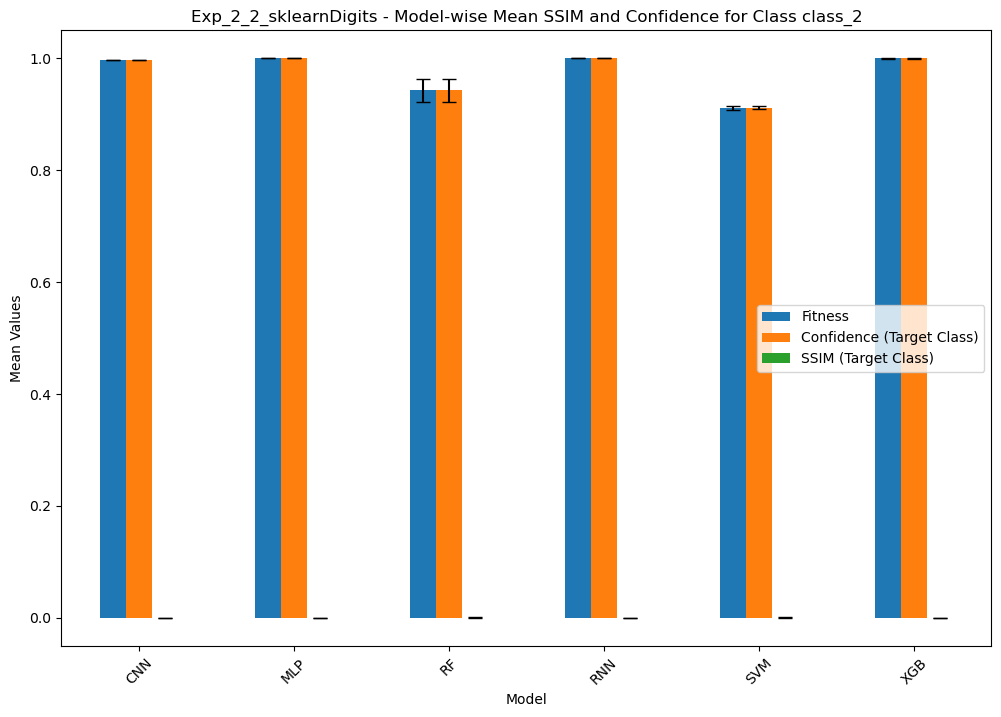

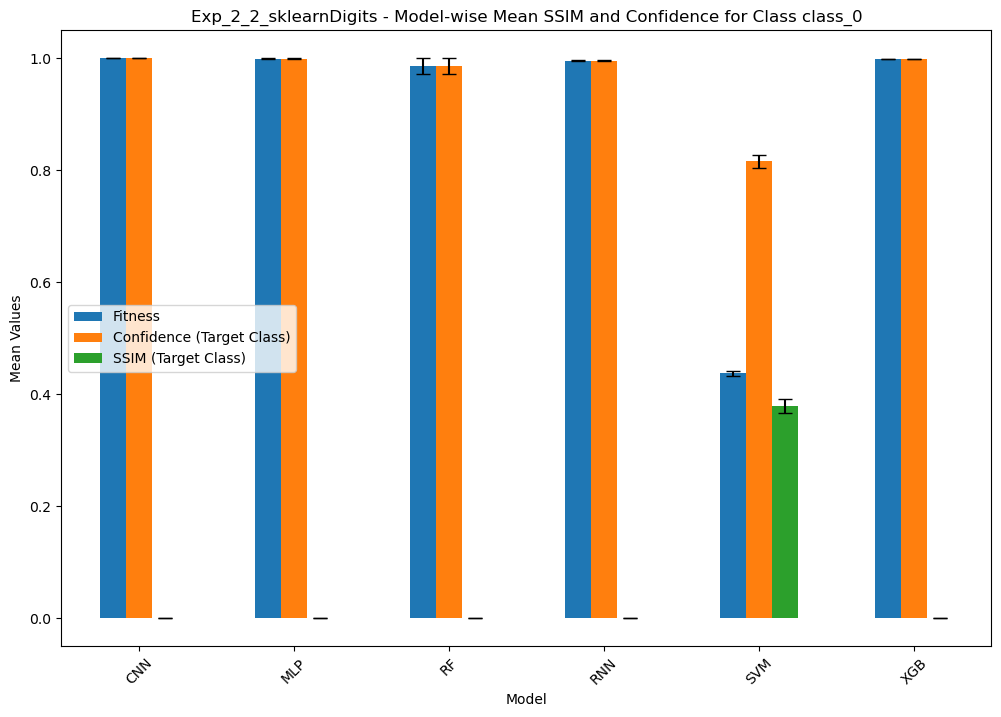

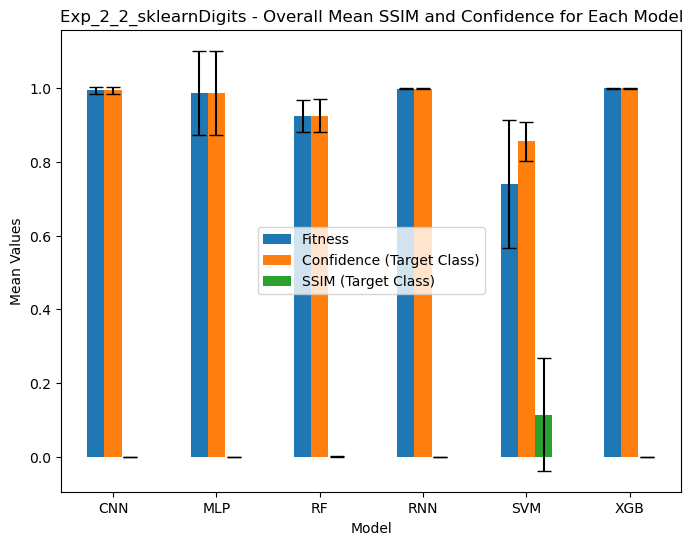

In [7]:
for experiment in experiments:
    for dataset in datasets:
        example_key = f"{experiment}_{dataset}"
        if example_key in aggregated_results:
            example_data = aggregated_results[example_key]

            # Model-wise mean values for each class
            model_class_means = example_data.groupby(['Model', 'Class'])[overall_columns].mean().unstack()

            # Plot each class separately with error bars
            for cls in example_data['Class'].unique():
                class_means = model_class_means.xs(cls, level='Class', axis=1)
                class_stds = example_data.groupby(['Model', 'Class'])[overall_columns].std().xs(cls, level='Class', axis=0)
                class_means.plot(kind='bar', yerr=class_stds, capsize=5, figsize=(12, 8))
                plt.title(f"{example_key} - Model-wise Mean SSIM and Confidence for Class {cls}")
                plt.ylabel("Mean Values")
                plt.xticks(rotation=45)
                plt.show()

            # Overall mean values for each model with error bars
            model_means = example_data.groupby('Model')[overall_columns].mean()
            model_stds = example_data.groupby('Model')[overall_columns].std()
            model_means.plot(kind='bar', yerr=model_stds, capsize=5, figsize=(8, 6))
            plt.title(f"{example_key} - Overall Mean SSIM and Confidence for Each Model")
            plt.ylabel("Mean Values")
            plt.xticks(rotation=0)
            plt.show()

In [8]:
for key, data in aggregated_results.items():
    unique_generations = data['Generation'].unique()
    if len(unique_generations) == 1:
        print(f"All replicates for {key} have the same Generation count: {unique_generations[0]}")
    else:
        print(f"Replicates for {key} have different Generation counts: {unique_generations}")

All replicates for Exp_2_2_sklearnDigits have the same Generation count: 50000


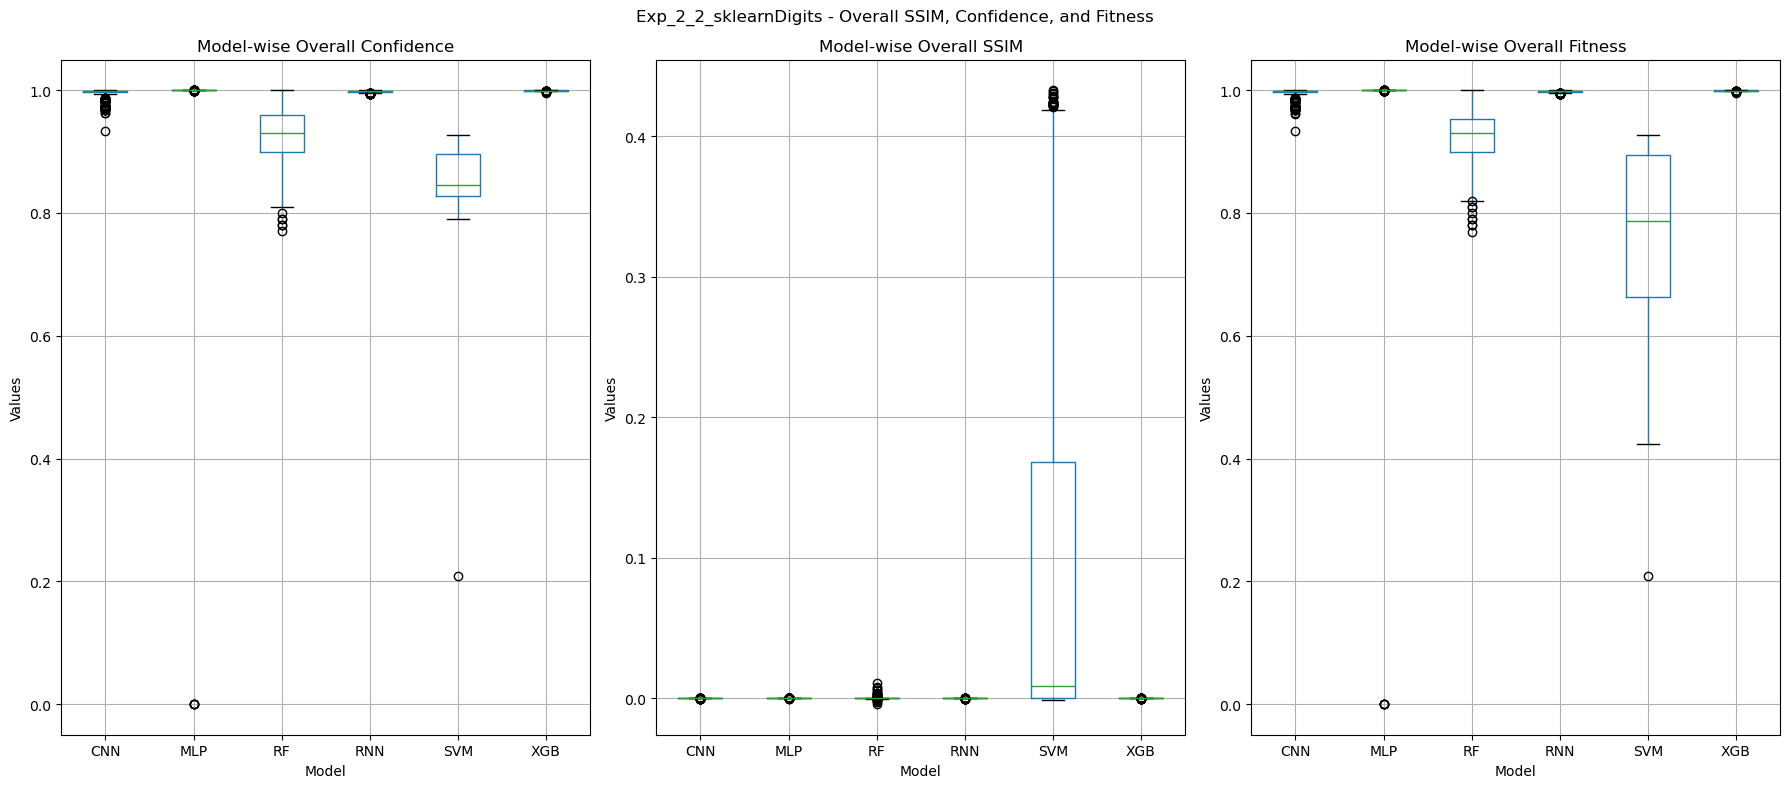

In [10]:
for experiment in experiments:
    for dataset in datasets:
        example_key = f"{experiment}_{dataset}"
        if example_key in aggregated_results:
            example_data = aggregated_results[example_key]
            # Model-wise mean values for each class
            model_class_means = example_data.groupby(['Model', 'Class'])[overall_columns].mean().unstack()
            # Plot overall SSIM, Confidence, and Fitness using box plot
            fig, axes = plt.subplots(1, 3, figsize=(18, 8))

            example_data.boxplot(column='Confidence (Target Class)', by='Model', ax=axes[0])
            example_data.boxplot(column='SSIM (Target Class)', by='Model', ax=axes[1])
            example_data.boxplot(column='Fitness', by='Model', ax=axes[2])

            axes[0].set_title('Model-wise Overall Confidence')
            axes[1].set_title('Model-wise Overall SSIM')
            axes[2].set_title('Model-wise Overall Fitness')
            for ax in axes:
                ax.set_xlabel('Model')
                ax.set_ylabel('Values')
            plt.suptitle(f'{example_key} - Overall SSIM, Confidence, and Fitness')  # Add plot title
            plt.tight_layout()
            plt.show()
